SystemExit: 0

/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


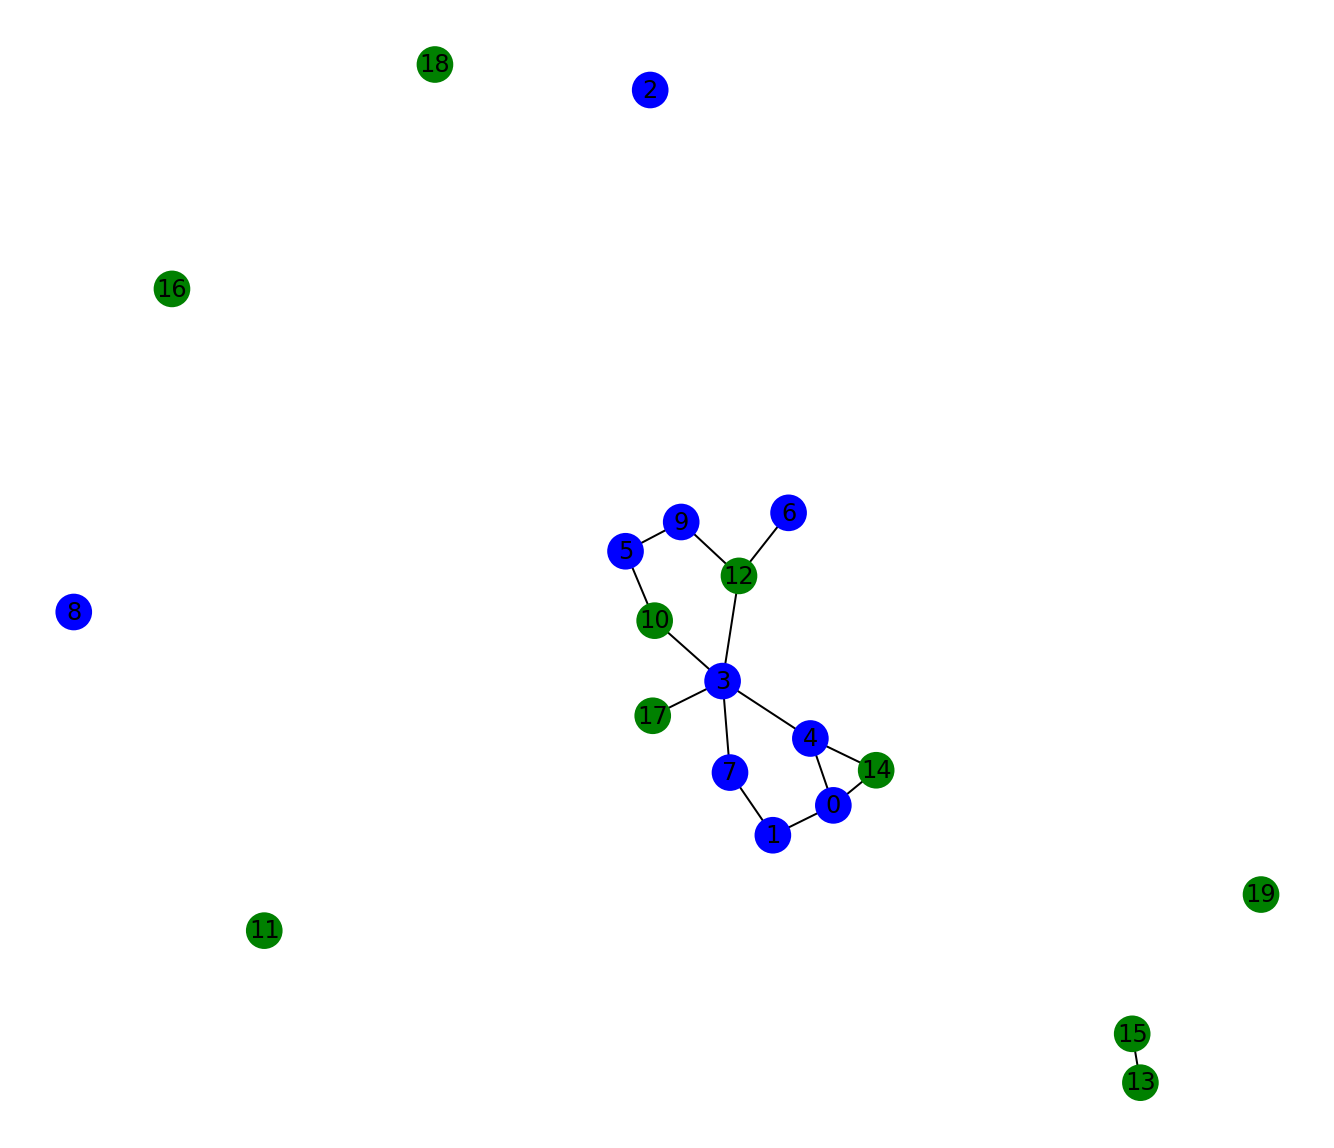

In [1]:
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from pyvis import network as net
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import networkx as nx

class PrettyWidget(QWidget):

    NumButtons = ['plot1','plot2', 'plot3']

    def __init__(self):


        super(PrettyWidget, self).__init__()        
        font = QFont()
        font.setPointSize(16)
        self.initUI()

    def initUI(self):

        self.setGeometry(100, 100, 800, 600)
        self.center()
        self.setWindowTitle('S Plot')

        grid = QGridLayout()
        self.setLayout(grid)
        self.createVerticalGroupBox() 

        buttonLayout = QVBoxLayout()
        buttonLayout.addWidget(self.verticalGroupBox)

        self.figure = plt.figure()
        self.canvas = FigureCanvas(self.figure)        
        grid.addWidget(self.canvas, 0, 1, 9, 9)          
        grid.addLayout(buttonLayout, 0, 0)

        self.show()


    def createVerticalGroupBox(self):
        self.verticalGroupBox = QGroupBox()

        layout = QVBoxLayout()
        for i in  self.NumButtons:
                button = QPushButton(i)
                button.setObjectName(i)
                layout.addWidget(button)
                layout.setSpacing(10)
                self.verticalGroupBox.setLayout(layout)
                button.clicked.connect(self.submitCommand)

    def submitCommand(self):
        eval('self.' + str(self.sender().objectName()) + '()')


    def plot1(self):
        self.figure.clf()
        ax1 = self.figure.add_subplot(211)
        x1 = [i for i in range(100)]
        y1 = [i**0.5 for i in x1]
        ax1.plot(x1, y1, 'b.-')

        ax2 = self.figure.add_subplot(212)
        x2 = [i for i in range(100)]
        y2 = [i for i in x2]
        ax2.plot(x2, y2, 'b.-')
        self.canvas.draw_idle()

    def plot2(self):
        self.figure.clf()
        ax3 = self.figure.add_subplot(111)
        x = [i for i in range(100)]
        y = [i**0.5 for i in x]
        ax3.plot(x, y, 'r.-')
        ax3.set_title('Square Root Plot')
        self.canvas.draw_idle()

    def plot3(self):
        self.figure.clf()
        G = nx.erdos_renyi_graph(20, 0.1)
        color_map = []
        for node in G:
            if node < 10:
                color_map.append('blue')
            else: 
                color_map.append('green')      
        nx.draw(G, node_color=color_map, with_labels=True)
        self.canvas.draw_idle()

    def center(self):
        qr = self.frameGeometry()
        cp = QDesktopWidget().availableGeometry().center()
        qr.moveCenter(cp)
        self.move(qr.topLeft())

if __name__ == '__main__':

    import sys  
    app = QApplication(sys.argv)
    app.aboutToQuit.connect(app.deleteLater)
    app.setStyle(QStyleFactory.create("gtk"))
    screen = PrettyWidget() 
    screen.show()   
    sys.exit(app.exec_())